In [40]:
# we have to import packages and libraries to use for our analysis
import numpy as np #linear algebra
import pandas as pd #use for data processing and datframes
import matplotlib.pyplot as plt# for visualisation
import seaborn as sn # for visualisation which aesthecially pleasing


In [41]:
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output


In [42]:
# now we import our data using pandas function
data =pd.read_csv(r"C:\Users\HP Demo\OneDrive - Stellenbosch University\Desktop\Python\Python\column_2C_weka.csv")
data.head(10)# to display our first ten lines of the data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [7]:
plt.style.use("ggplot")

Supervised Learning  

In [8]:
# we  start with EDA to make  sure our data is in a usable state
data.info() # to check our data and to see if we  have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


we have etsbllished the length of oiur data with 310 entries. 

Of the seven coklumns 6 are floats and one is an object. 

In [9]:
#we ccontinue with EDA
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [10]:
#to see the results in our category target variable we use the describe function
data["class"].describe()

count          310
unique           2
top       Abnormal
freq           210
Name: class, dtype: object

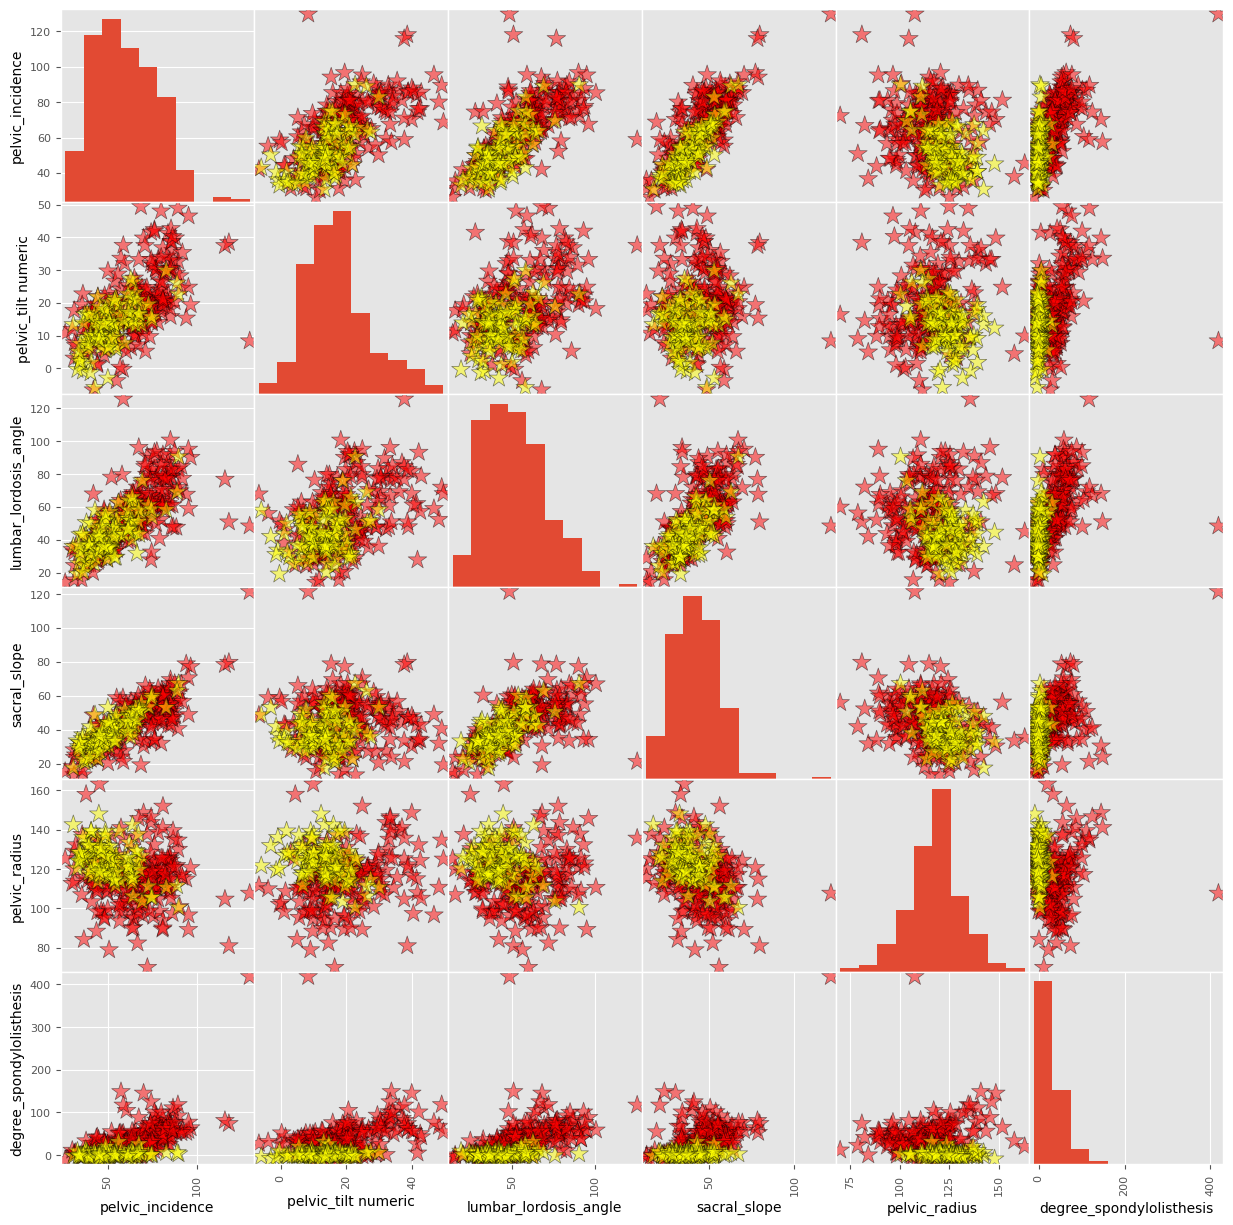

In [11]:
color_list = ['red' if i=='Abnormal' else 'yellow' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

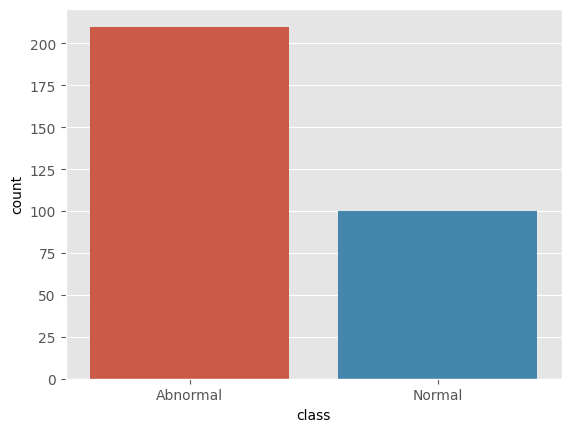

In [12]:
sn.countplot( x= "class", data = data)
data.loc[:,'class'].value_counts()

K-Nearest Neighbours (KNN)

In [26]:
# WE WOULD LIKE TO USE THE K-NEAREST NEIGHBOUR to classify our data since the variable is a a binary categorical data
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=3)
x,y = data.loc[:,data.columns != 'class'],data.loc[:, 'class']
Knn.fit(x,y)
prediction = Knn.predict(x)
print('Prediction:{}'.  format(prediction))

Prediction:['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abn

In [14]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(x,y,test_size= 0.3, random_state=1)
Knn=KNeighborsClassifier(n_neighbors=3)
x,y =data.loc[:,data.columns != 'class'],data.loc[:,'class']
Knn.fit(x_train,y_train)
prediction =Knn.predict(x_test)
print ('With KNN (K=3) accuracy is : ', Knn.score(x_test,y_test))

With KNN (K=3) accuracy is :  0.8602150537634409


In [28]:
neig =np.arange(1,25)
train_accuracy =[]
test_accuracy=[]
for i, k in enumerate(neig):
    Knn= KNeighborsClassifier(n_neighbors=k)
    Knn.fit(x_train,y_train)
    train_accuracy.append(Knn.score(x_train,y_train))
    test_accuracy.append(Knn.score(x_test,y_test))

plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing accuracy')
plt.plot(neig, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title("-value VS Accuracy")
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


ValueError: Unknown label type: 'continuous'

Regression

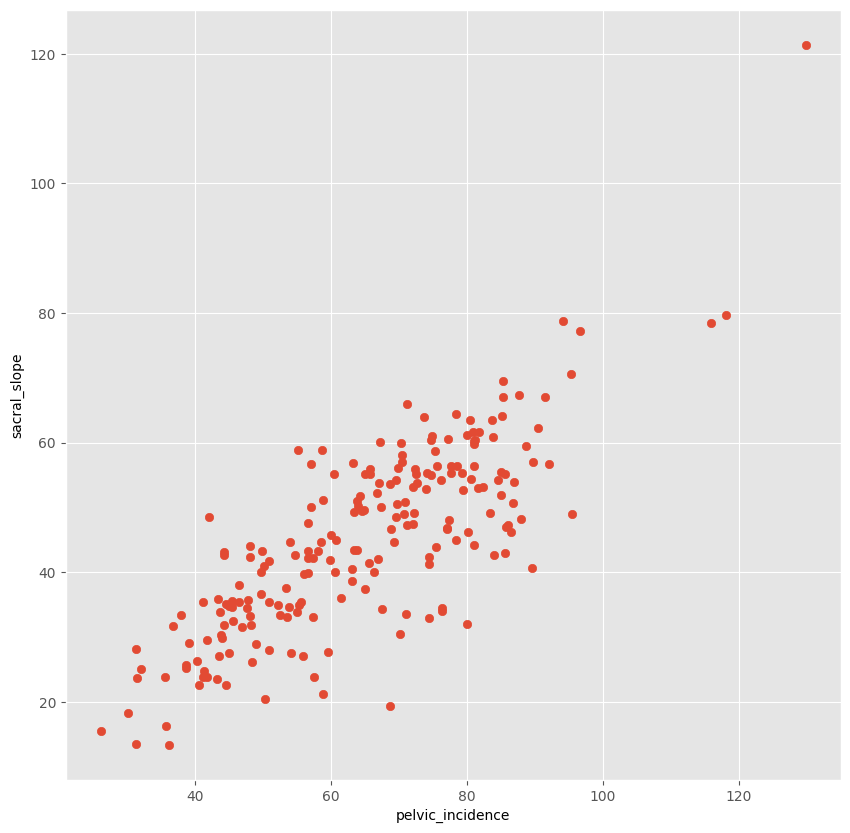

In [29]:
data1= data[data['class']=='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:, 'sacral_slope']).reshape(-1,1)
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score: 0.6458410481075871


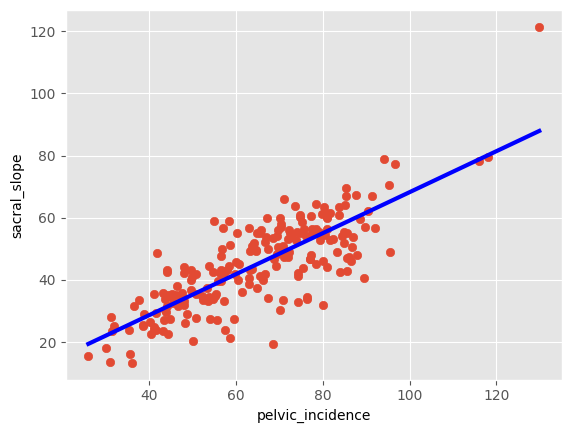

In [30]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()
predict_space= np.linspace(min(x),max(x)).reshape(-1,1)
reg.fit(x,y)
predicted = reg.predict(predict_space)
print("R^2 score:", reg.score(x,y))
plt.plot(predict_space,predicted, color ='blue', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()


Cross Validation 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Create a LinearRegression model instance
reg = LinearRegression()

# Fit the model to the training data
reg.fit(x_train, y_train)

# Calculate R^2 score on the test data
r2_score = reg.score(x_test, y_test)

print("R^2 score:", r2_score)

R^2 score: 0.5636410932885505


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1)

# Create a LinearRegression model instance
reg= LinearRegression()

# Perform cross-validation and calculate R^2 scores
cv_scores=cross_val_score(reg, x_train,y_train,cv=5)

# Fit the model to the training data
reg.fit(x_train,y_train)

# Calculate R^2 score on the test data
r2_score= reg.score(x_test,y_test)

print("Cross-Validation Scores:", cv_scores)
print("Average CV R^2 score:", np.mean(cv_scores))
print("Test Set R^2 score:", r2_score)


Cross-Validation Scores: [0.66363946 0.53739026 0.40501861 0.74323267 0.62593661]
Average CV R^2 score: 0.5950435238808236
Test Set R^2 score: 0.5636410932885505


Regulized regression

In [33]:
#Ridge regression
#import the necessary packages/libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge

#split the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=2)
#assign the model to a variable
ridge = Ridge(alpha=0.1)

cv2_scores=cross_val_score(ridge, x_train,y_train,cv=5)
#fit the model with the training data
ridge.fit(x_train,y_train)
#we now use the model to make predictions
ridge_predict= ridge.predict(x_test)
#assing the score fucntion pf the model to a variable 
r_score=ridge.score(x_test,y_test)

print("Test Set R^2 score:", r_score)
print("Cross-Validation Scores:", cv2_scores)
print("Average CV R^2 score:", np.mean(cv2_scores))


Test Set R^2 score: 0.5732611808361024
Cross-Validation Scores: [0.67897099 0.50320153 0.7650301  0.6517724  0.67198409]
Average CV R^2 score: 0.6541918216681449


In [21]:
#Lasso regression 
from sklearn.linear_model import Lasso

#split  the data into train and test data
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=3)
# we assign the lasso model to a variable
lasso= Lasso(alpha=0.1)


cv3_scores=cross_val_score(lasso, x_train,y_train,cv=5)
#we train the data on training data
lasso.fit(x_train, y_train)
# we use the modle to predict  using the test data
lasso_predict= lasso.predict(x_test)

print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)
print("Cross-Validation Scores:", cv3_scores)
print("Average CV R^2 score:", np.mean(cv3_scores))


Lasso score:  0.7003505046940091
Lasso coefficients:  [0.62683019]
Cross-Validation Scores: [0.71434418 0.37443529 0.52907903 0.72895612 0.29038966]
Average CV R^2 score: 0.5274408554653848


Random forest

In [51]:
# we import the ncessary packages
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble  import RandomForestClassifier
# we specify  the data in our  data freame 
x,y = data.loc[:, data.columns!='class'], data.loc[:,'class']
# we split our data inot training data and test data
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3, random_state=1)
# we assign ur model to a variable
rf=RandomForestClassifier(random_state=4)
# we train the model  using the fit function
rf.fit(x_train,y_train)
# we try to use   the predict function to predict the test data
y_predict=rf.predict(x_test)

cm = confusion_matrix(y_test,y_predict)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_predict))



Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



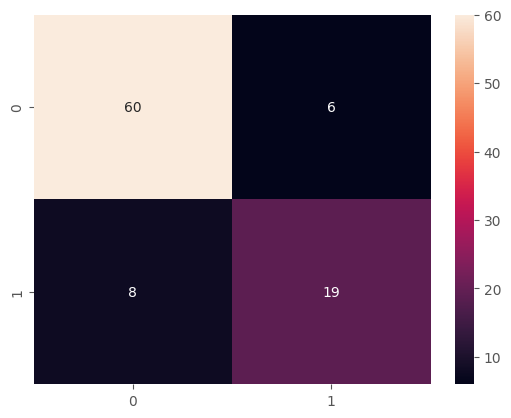

In [53]:
sn.heatmap(cm,annot=True, fmt='d')
plt.show()

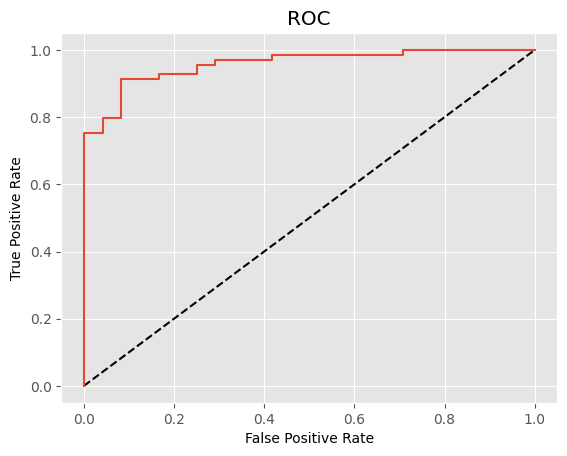

In [68]:
# we import the necessary libraries  and models- logistic regression, plotting with roc_curve, evaluation metrics
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

data['class_binary'] = [1 if c == 'Abnormal' else 0 for c in data['class']]

x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

logreg= LogisticRegression()
logreg.fit(x_train, y_train)

y_pred_prob = logreg.predict_proba(x_test)[:,1]

fpr, tpr, thresholds =roc_curve(y_test,y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
